# 📘 Anomaly Detection & Time Series – Complete Assignment


## Question 1: What is Anomaly Detection?
**Answer:**

Anomaly Detection is the process of identifying data points that deviate significantly from normal patterns.

**Types:**
- **Point Anomaly:** Single abnormal value (e.g., sudden spike in temperature).
- **Contextual Anomaly:** Abnormal in a specific context (e.g., high electricity usage at night).
- **Collective Anomaly:** A group of unusual data points (e.g., DDoS attack traffic).

## Question 2: Compare Isolation Forest, DBSCAN, and LOF
**Answer:**

- **Isolation Forest:** Tree-based, isolates anomalies quickly; good for large datasets.
- **DBSCAN:** Density-based; finds clusters and noise.
- **LOF:** Compares local density; good for subtle anomalies.

## Question 3: Key Components of Time Series
**Answer:**

- **Trend:** Long-term direction (e.g., sales growth).
- **Seasonality:** Repeating patterns (e.g., monthly demand).
- **Cyclical:** Irregular long-term cycles.
- **Residual:** Random noise.

## Question 4: Stationarity in Time Series
**Answer:**

A stationary series has constant mean, variance, and autocorrelation.

**Tests:** ADF Test
**Transformations:** Differencing, log transform, detrending.

## Question 5: AR vs MA vs ARIMA vs SARIMA vs SARIMAX
**Answer:**

- **AR:** Uses past values
- **MA:** Uses past errors
- **ARIMA:** AR + MA + differencing
- **SARIMA:** ARIMA with seasonality
- **SARIMAX:** SARIMA with exogenous variables

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


## Question 6: Time Series Decomposition (AirPassengers)

/tmp/ipython-input-1078175862.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='1949-01', periods=len(data), freq='M'))


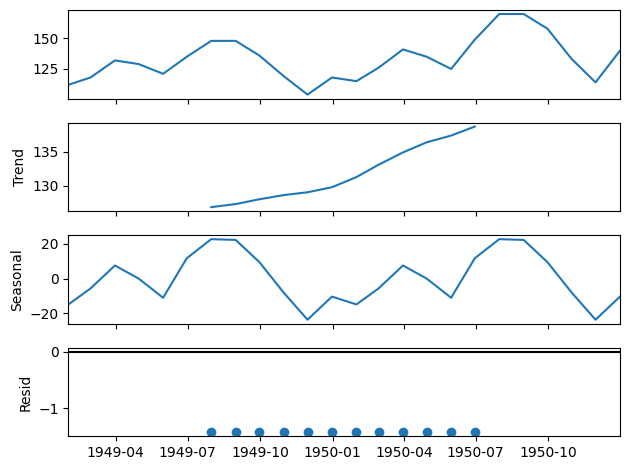

In [2]:

# Load AirPassengers dataset
data = [112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140]
ts = pd.Series(data,
               index=pd.date_range(start='1949-01', periods=len(data), freq='M'))

# Plot and decompose
result = seasonal_decompose(ts, model='additive')
result.plot()
plt.show()


## Question 7: Isolation Forest for Anomaly Detection

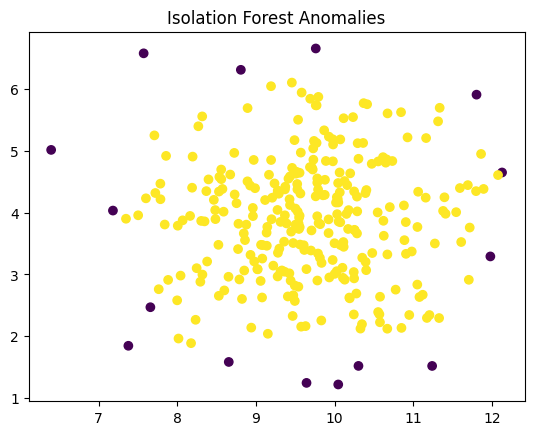

In [3]:

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0)
iso = IsolationForest(contamination=0.05)
labels = iso.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Isolation Forest Anomalies")
plt.show()


## Question 8: SARIMA Forecasting

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


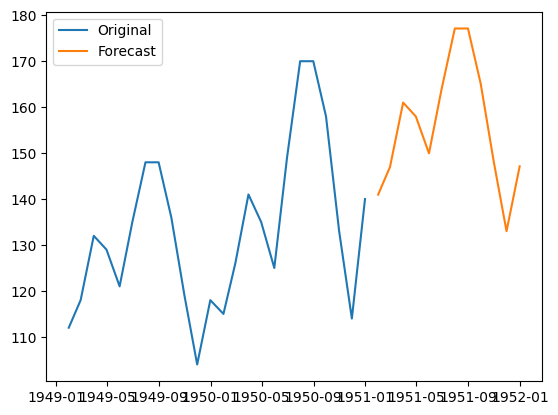

In [4]:

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
fit = model.fit(disp=False)
forecast = fit.forecast(12)

plt.plot(ts, label='Original')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


## Question 9: Local Outlier Factor

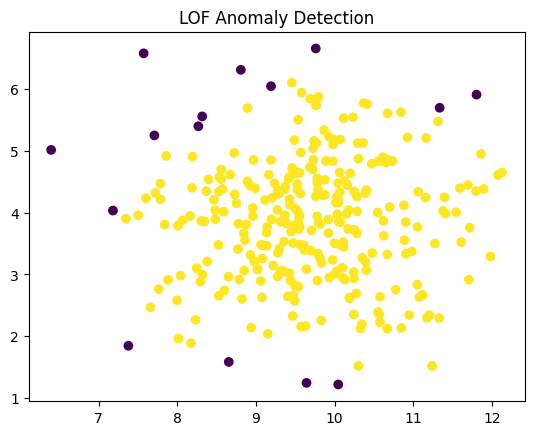

In [5]:

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("LOF Anomaly Detection")
plt.show()


## Question 10: Real-Time Energy Monitoring Workflow
**Answer:**

- **Anomaly Detection:** Isolation Forest for streaming data
- **Forecasting:** SARIMAX with weather variables
- **Validation:** Rolling window metrics, retraining
- **Business Value:** Prevent outages, optimize load